# 1) Fit a random forest to the data and make some plots:

a) Choose a test/train split (some natural choices: train on 2011, test on 2012, or train on 75% of the data, test on 25% of the data).

b) Choose a target variable (some natural choices: found.weapon, found.gun, arrested, frisked, searched, summons.issued, found.contraband, any of the “use of force” variables (e.g. force.baton or force.handcuffs, or you can create an aggregate of all the force variables).

c) [Optional] restrict to a subset of the data. For example, if your outcome measure is found.weapon or found.gun, it may make sense to restrict to stops with suspected.crime==’cpw’, or if your outcome measure is found.contraband, it may make sense to restrict to stops with a suspected crime involving criminal sale/possession of “marihuana” and criminal sale/possession of a controlled substance.

d) Fit the model (with at least 1000 trees), predict probabilities for each stop in the test set, and do the following:

    i) Select two categorical features, and make two corresponding plots comparing the average model prediction and empirical outcome for each value of that feature. For example, if a chosen feature is ‘precinct’, the plot should have a point for each precinct, where the x­value is the average model prediction for all stops in that precinct, and the y­value is the average value of your target variable for all stops in that precinct.
    
    ii) Write (at least) one paragraph explaining your work in parts a)­d). Make sure to explain your target variable, predictors, how you chose your test/train split, and any other choices you made.

In [3]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [4]:
df = pd.DataFrame.from_csv('hw_2_stops.csv', index_col = False)

In [5]:
# df.head()

In [6]:
# list(df.columns)

In [7]:
#select features and label

df = df.dropna()

df = df.sample(100000)

label = df['arrested']

features = df [['suspected.crime', 'suspect.race', 'suspect.age', 'suspect.build', 'suspect.sex', 'suspect.height',
             'suspect.weight', 'stopped.bc.desc', 'stopped.bc.violent', 'stopped.bc.other', 'stopped.bc.object',
             'stopped.bc.casing', 'stopped.bc.lookout', 'stopped.bc.drugs', 'stopped.bc.clothing', 'stopped.bc.furtive',
             'stopped.bc.bulge', 'precinct', 'inside.outside', 'location.housing', 'observation.period','officer.uniform',
             'radio.run', 'day', 'month', 'time.period', 'lat', 'lon']] 

In [8]:
features = pd.get_dummies(features)

In [9]:
# list(features.columns)

In [10]:
#split train and test data 

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=1)

In [11]:
#train the model

rf = RandomForestClassifier(n_jobs=-1, n_estimators=1000)
rf.fit(features_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
# generate predictions and add them to 'results'
rf_predictions = rf.predict_proba(features_test)

# get AUC score (produce probabilistic predictions)
print "AUC score =", roc_auc_score(label_test, rf_predictions[:, 1])

# get accuracy (predict the class)
rf_predictions_class = rf.predict(features_test)
print "accuracy =", accuracy_score(label_test, rf_predictions_class, normalize=True)

AUC score = 0.803324213379
accuracy = 0.94144


In [13]:
#important features

features_train.columns[np.argsort(rf.feature_importances_)[::-1]]

Index([u'lon', u'lat', u'suspect.age', u'suspect.weight', u'precinct',
       u'suspect.height', u'time.period', u'observation.period',
       u'officer.uniform', u'stopped.bc.furtive',
       ...
       u'suspected.crime_prohibited use of weapon', u'suspected.crime_bigamy',
       u'suspected.crime_unauthorized use of computer',
       u'suspected.crime_misapplication of property',
       u'suspected.crime_hazing', u'suspected.crime_falsify business records',
       u'suspected.crime_incest', u'suspected.crime_adultery',
       u'suspected.crime_hindering prosecution',
       u'suspected.crime_unlawfull imprisonment'],
      dtype='object', length=141)

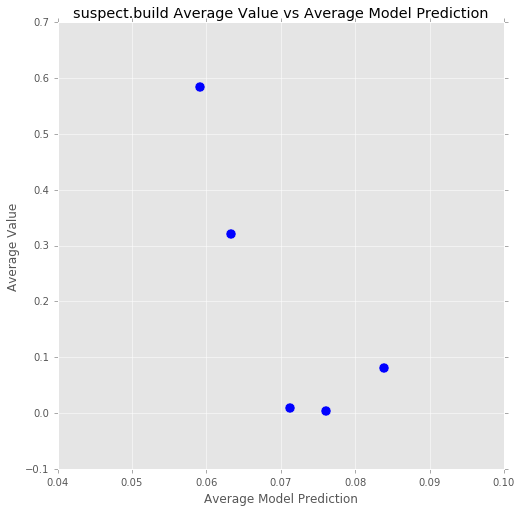

In [14]:
# plot for 'suspect.build'  
cols = [i for i in features.columns if 'suspect.build' in i]
points = []
for i in cols:
    points.append([rf_predictions[np.where(features_test[i] == 1)].mean(axis=0)[1], features[i].mean()])
points = np.array(points)    

figure, ax = pl.subplots(figsize=(8,8))
ax.scatter(points[:,0], points[:,1], s=100)
ax.set_xlabel('Average Model Prediction')
ax.set_ylabel('Average Value')
ax.set_title('suspect.build Average Value vs Average Model Prediction')

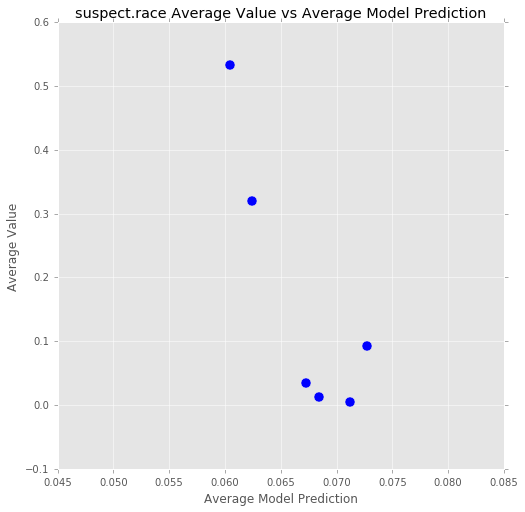

In [15]:
# plot for 'suspect.race'  
cols = [i for i in features.columns if 'suspect.race' in i]
points = []
for i in cols:
    points.append([rf_predictions[np.where(features_test[i] == 1)].mean(axis=0)[1], features[i].mean()])
points = np.array(points)    

figure, ax = pl.subplots(figsize=(8,8))
ax.scatter(points[:,0], points[:,1], s=100)
ax.set_xlabel('Average Model Prediction')
ax.set_ylabel('Average Value')
ax.set_title('suspect.race Average Value vs Average Model Prediction')

## explanation

First, I select 'arrested' as label and some features. Then I take 100000 records from the whole dataset for training and testing in my local machine. Then a split them to train dataset and test dataset by 75%-25%. Then I train random forest model on with 1000 trees and get AUC and Accuracy score. Finally, I select suspect.build and suspect.race two features to plot average real value vs average model prediction

# 2) Fit a decision tree to the data and make a plot:

a) Choose a test/train split.

b) Choose a target variable (you may choose the same target as in question 1) or a different one).
 
c) [Optional] restrict to a subset of the data, as in question 1) 

d) For the decision tree package of your choice (e.g. http://scikit­learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), choose a parameter governing model simplicity. For example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier for different values of this parameter and for each such value, record the corresponding AUC score.

    i) Make a plot of performance vs. simplicity for different values of the parameter chosen in part d). That is, the x­axis should be parameter value (e.g. tree depth) and the y­axis should be AUC score.
    
    ii) Visualize a simple decision tree (e.g. a “shallow” tree, or a tree with few leaf nodes) classifier and report its performance. You can draw the decision tree by hand or use a graphical representation (e.g. http://scikit­learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) , but make sure it is easy to understand (e.g. the features chosen for each split should be clearly labeled in each internal node, as well as the prediction at each leaf node).
    
    iii) Write (at least) one paragraph explaining your work in parts a)­d). Make sure to explain your target variable, predictors, how you chose your test/train split, and any other choices you made.

In [16]:
result = []
depth = range(1,100,5)
for i in depth:
    dt = DecisionTreeClassifier(max_depth=i)
    dt = dt.fit(features_train, label_train)
    result.append(roc_auc_score(label_test, dt.predict(features_test)))

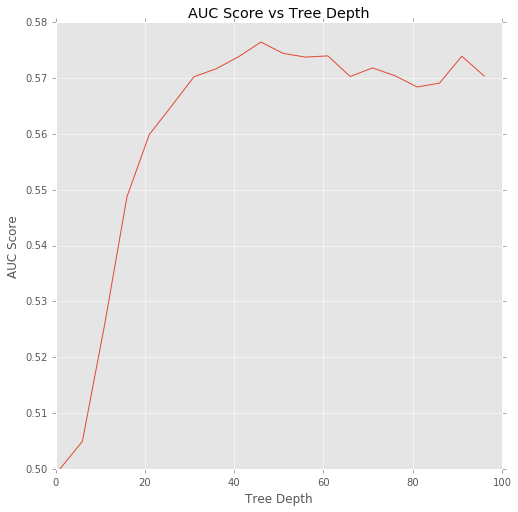

In [17]:
figure, ax = pl.subplots(figsize=(8,8))
ax.plot(depth,result)
ax.set_xlabel('Tree Depth')
ax.set_ylabel('AUC Score')
ax.set_title('AUC Score vs Tree Depth')

In [18]:
rf = DecisionTreeClassifier(max_depth=2)
rf = rf.fit(features_train, label_train)

In [22]:
df = export_graphviz(rf, out_file='tree.dot', feature_names=features.columns)

In [23]:
import pydot

graph = pydot.graph_from_dot_file('tree.dot')

In [26]:
graph

<img src="tree.png">

The decision tree was trained with various depths for 1 to 100. The training and testing data was reused.